In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("loans.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [4]:
df.info() #  null values are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   annual_inc         9574 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9549 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9516 non-null   float64
 10  inq.last.6mths     9549 non-null   float64
 11  delinq.2yrs        9549 non-null   float64
 12  pub.rec            9549 non-null   float64
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [5]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
annual_inc           1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not_fully_paid          2
dtype: int64

In [6]:
df.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not_fully_paid        0
dtype: int64

# Imputing Missing Values

In [7]:
df = df.interpolate() # imputing missing values

In [8]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
annual_inc           0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not_fully_paid       0
dtype: int64

# Dummies Applied

In [9]:
df_encode = pd.get_dummies(df,drop_first=True)

In [10]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   annual_inc                  9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   float64
 10  delinq.2yrs                 9578 non-null   float64
 11  pub.rec                     9578 non-null   float64
 12  not_fully_paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# correlation

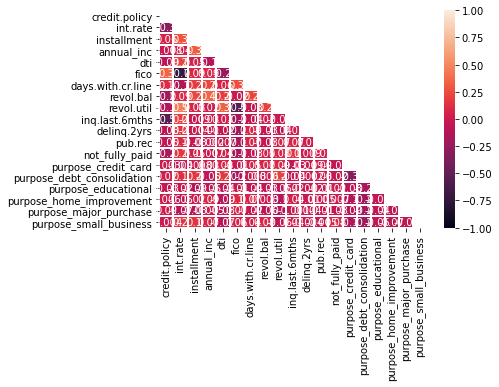

In [11]:
sns.heatmap(data=df_encode.corr(),annot=True,vmin=-1,vmax=1,linewidths=1,fmt='.1g',mask=np.triu(df_encode.corr()))
plt.show()

# VIF

In [15]:
x = df_encode.drop("credit.policy",axis=1)
y = df_encode['credit.policy']

In [16]:
vif= pd.DataFrame()
vif['factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif.round(1)

,factor,feature
0,30.3,int.rate
1,4.5,installment
2,2.9,annual_inc
3,5.4,dti
4,24.4,fico
5,5.3,days.with.cr.line
6,1.6,revol.bal
7,5.7,revol.util
8,1.7,inq.last.6mths
9,1.2,delinq.2yrs


In [17]:
x = x.drop("int.rate",axis=1)

vif= pd.DataFrame()
vif['factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif.round(1)

,factor,feature
0,4.2,installment
1,2.9,annual_inc
2,5.3,dti
3,12.2,fico
4,5.1,days.with.cr.line
5,1.6,revol.bal
6,4.3,revol.util
7,1.6,inq.last.6mths
8,1.1,delinq.2yrs
9,1.1,pub.rec


In [18]:
x = x.drop("fico",axis=1)

vif= pd.DataFrame()
vif['factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif.round(1)

,factor,feature
0,4.0,installment
1,2.8,annual_inc
2,4.6,dti
3,4.1,days.with.cr.line
4,1.5,revol.bal
5,4.0,revol.util
6,1.5,inq.last.6mths
7,1.1,delinq.2yrs
8,1.1,pub.rec
9,1.2,not_fully_paid


# train test split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

# Training

In [20]:
model=LogisticRegression(n_jobs=-1)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [21]:
predictprob = model.predict_proba(x_test)

In [22]:
predictions

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

# Evaluation Metrics

In [23]:
metrics.accuracy_score(y_test,predictions)

0.8830897703549061

In [24]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
model.coef_

array([[ 2.50208830e-03,  1.34504108e-05,  5.64623024e-02,
         3.94547768e-04, -4.54411913e-05, -4.12876495e-03,
        -8.27708495e-01, -3.23175639e-02, -1.29398826e-02,
        -3.62664611e-02,  7.38901629e-03,  1.46164975e-02,
        -1.09705077e-03, -2.34223558e-03,  4.10049268e-03,
        -1.36165865e-03]])

In [26]:
model.intercept_

array([0.0252645])

In [27]:
metrics.confusion_matrix(y_test,predictions)

array([[ 302,  232],
       [ 104, 2236]], dtype=int64)

In [28]:
metrics.precision_score(y_test,predictions)

0.9059967585089141

In [29]:
metrics.recall_score(y_test,predictions)

0.9555555555555556

In [30]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.57      0.64       534
           1       0.91      0.96      0.93      2340

    accuracy                           0.88      2874
   macro avg       0.82      0.76      0.79      2874
weighted avg       0.88      0.88      0.88      2874



# ROC

In [31]:
fpr,tpr,threshold = metrics.roc_curve(y_test,predictions)
print(fpr,tpr,threshold)

[0.         0.43445693 1.        ] [0.         0.95555556 1.        ] [2 1 0]


In [32]:
type(fpr),fpr.shape

(numpy.ndarray, (3,))

In [33]:
set(predictions)

{0, 1}

In [34]:
metrics.auc(fpr,tpr)

0.7605493133583022

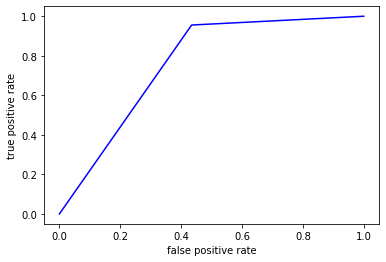

In [35]:
plt.plot(fpr,tpr,color='b')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()


# ThresholdManipulation

In [36]:
predictprob

array([[5.99913209e-01, 4.00086791e-01],
       [2.81533879e-02, 9.71846612e-01],
       [8.30180888e-01, 1.69819112e-01],
       ...,
       [7.71125251e-02, 9.22887475e-01],
       [9.99205518e-01, 7.94481668e-04],
       [4.48626931e-02, 9.55137307e-01]])

In [37]:
predictprob[:,1]

array([4.00086791e-01, 9.71846612e-01, 1.69819112e-01, ...,
       9.22887475e-01, 7.94481668e-04, 9.55137307e-01])

In [38]:
x=[]
for i in predictprob[:,1]:
    if i>0.2:
        x.append(1)
    else:
        x.append(0)
x = np.array(x).flatten()        
metrics.accuracy_score(y_test,x)        

0.8663883089770354